In [1]:
# Librerias 
%run imports.py 


# SEGUNDA PARTE DEL EDA

## Lectura previa 

1) Lectura del fichero prototipo para modelizar:

In [6]:
df = pd.read_csv("output\model_photosv1.0.csv")
df.head()

,photo_id,business_id,caption,label
0,6LJa8QZOGBjt9maE5miLhw,368cyArdo0P0aDUOhhE4PA,Drive-thru menu,menu
1,T_QaBsquJlzAQd5bbCrLfA,jwpZzqoPFLuHE-FwLp41cQ,Courtyard at Bistro di Marino,outside
2,DtsfhqhqUB-tjs5XbwJfXw,s-74t4aQKL2pWeQmIB-c1Q,Vegan Options,menu
3,Iehiw_bcHnXw-pg0w2M06w,64jKdxGGwfHx4rutBBKWBQ,"New Keto Protein Punch! 15g protein, 3g of car...",drink
4,JClkivVTbSvCJAsdqtOa2g,ToqcYJVdnrp4fefaucm-Vg,NaN,inside


2) Filtramos por las features que vamos a introducir en el modelo (podemos dejar las demás pero por hacerlo mas legible he cogido las dos principales)

In [7]:
# Filtrado por "photo_id" y "label" para luego meter la resolucion

df_id = df[["photo_id", "label"]]
df_id.head()

,photo_id,label
0,6LJa8QZOGBjt9maE5miLhw,menu
1,T_QaBsquJlzAQd5bbCrLfA,outside
2,DtsfhqhqUB-tjs5XbwJfXw,menu
3,Iehiw_bcHnXw-pg0w2M06w,drink
4,JClkivVTbSvCJAsdqtOa2g,inside


## Obtención de la resolucion de cada imagen

1) Añadimos al dataset filtrado de arriba (df_id) la resolución de cada una de las imagenes

In [8]:
# Obtencion de la resolucion

image_ids = df["photo_id"].to_list()  # listamos los ids de las imagenes
photo_directory = "photos" # ruta de la carpeta de las fotos

# guardado de la resolucion 
anchuras = []
alturas = []

for image in image_ids: 
    image_path = os.path.join(photo_directory,f"{image}.jpg")
    img = Image.open(image_path)
    anchura, altura  = img.size

    anchuras.append(anchura)
    alturas.append(altura)


df_id["anchura"] = anchuras
df_id["altura"] = alturas 

df_id.head()

C:\Users\varel\AppData\Local\Temp\ipykernel_48076\607359035.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id["anchura"] = anchuras


,photo_id,label,anchura,altura
0,6LJa8QZOGBjt9maE5miLhw,menu,300,400
1,T_QaBsquJlzAQd5bbCrLfA,outside,300,400
2,DtsfhqhqUB-tjs5XbwJfXw,menu,400,400
3,Iehiw_bcHnXw-pg0w2M06w,drink,400,400
4,JClkivVTbSvCJAsdqtOa2g,inside,266,400


### Representación de las Resoluciones

1) Para esto he hecho directamente un histograma (he probado a hacer heatmap pero no he conseguido insights muy claros, si alguien se anima vendria guay)
2) Las graficas de abajo nos dan una estimacion de qué resoluciones predominan en el dataset (en cualquier caso, he hecho el describe mas abajo del dataframe con las resoluciones y la verdad que es mucho mas legible). RESUMEN = Las graficas tampoco es que queden muy bonitas --> darle una vuelta a como generar visualizacion atractiva de esto.


C:\Users\varel\AppData\Local\Temp\ipykernel_48076\4274976685.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_id["altura"], palette="summer", kde=True, color="green")


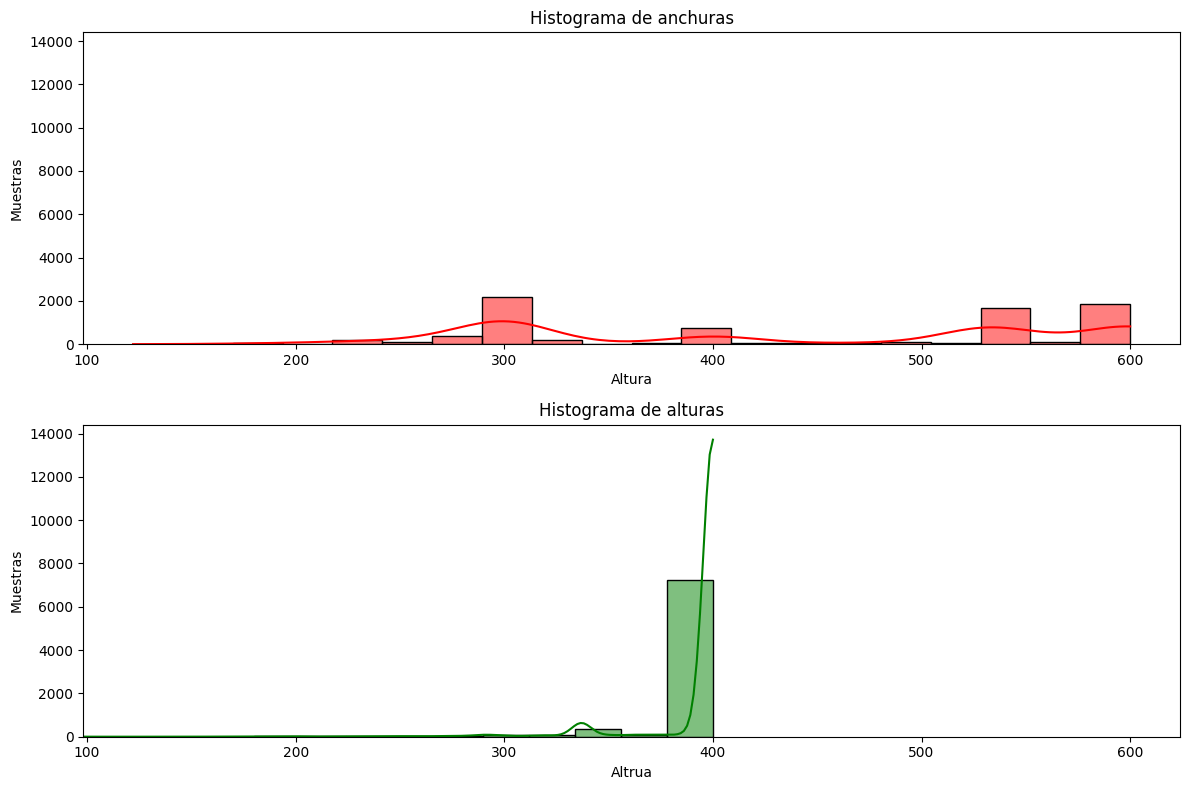

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# Anchuras
sns.histplot(df_id["anchura"], ax=ax1, kde=True, color= "red")
ax1.set_title('Histograma de anchuras')
ax1.set_xlabel('Altura')
ax1.set_ylabel('Muestras')
# Alturas
sns.histplot(df_id["altura"], palette="summer", kde=True, color="green")
ax2.set_title('Histograma de alturas')
ax2.set_xlabel('Altrua')
ax2.set_ylabel('Muestras')

ax2.set_xlim(ax1.get_xlim())  # Ajustar límites del eje x de altura a anchuras 
ax1.set_ylim(ax2.get_ylim())  # Ajustar límites del eje y de altura a anchuras

plt.tight_layout()  # Ajusta las graficas entre si 

plt.show()

3) He aquí el mágico describe 

In [30]:
# Describe de las fotos para modelizar
df_id.describe()


,anchura,altura
count,7965.000000,7965.000000
mean,435.365348,392.341117
std,133.404999,27.520191
min,122.000000,92.000000
25%,300.000000,400.000000
50%,408.000000,400.000000
75%,547.000000,400.000000
max,600.000000,400.000000


4) Aquí he querido hacer una prueba para ver como rotar una foto random por el eje horizontal (más abajo extraigo un fichero de imagenes "rotadas" para el tema del data augmentation)

In [33]:
random_img = random.choice(image_ids)

random_img_path = os.path.join(photo_directory, f"{random_img}.jpg")

Image.open(random_img_path).show()

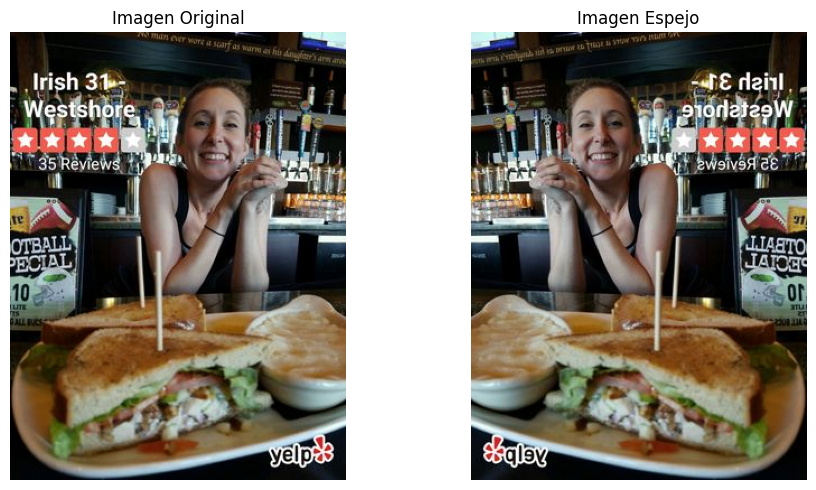

In [35]:

image = cv2.imread(random_img_path)
# Transformacion de giro 
mirrored_image = cv2.flip(image, 1)  # 1 -> giro horizontal 


""" VISUALIZACION DEL GIRO (EJEMPLO)

# Visualizar Ejemplo 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Espejo')
plt.axis('off')

plt.tight_layout()
plt.show()

"""

with open("mirrow_model_photosv1.0.csv", "w") as outfile: 
    

## Data Augmentation 

1) Aquí condenso todo el proceso de cargado de las imagenes buenas, las roto y las guardo con su mismo nombre pero con el sufijo "_mirror" por si no queremos meterlas o simplemente por tener todo más ordenado.

In [67]:
# Guardado de imagenes rotadas

ruta_guardado ="mirror_photos"      # Creamos la carpeta (si no esta creada) de almacenamiento 
if not os.path.exists(ruta_guardado): 
        os.makedirs(ruta_guardado)

for image in image_ids: 
    image_path = os.path.join(photo_directory,f"{image}.jpg")  # Comparte la primera parte del loop para obtener la resolucion 
    img = Image.open(image_path)
    
    # Generamos la nueva imagen: 
    imagen_rotada =img.transpose(Image.FLIP_LEFT_RIGHT)
    nombre_original, extension = os.path.splitext(os.path.basename(image_path))
    output_image = f'{ruta_guardado}/{nombre_original}_mirror{extension}'
    imagen_rotada.save(output_image)

    print(f"La imagen {nombre_original} ha sido rotada y copiada como {output_image}")

La imagen 6LJa8QZOGBjt9maE5miLhw ha sido rotada y copiada como mirror_photos/6LJa8QZOGBjt9maE5miLhw_mirror.jpg
La imagen T_QaBsquJlzAQd5bbCrLfA ha sido rotada y copiada como mirror_photos/T_QaBsquJlzAQd5bbCrLfA_mirror.jpg
La imagen DtsfhqhqUB-tjs5XbwJfXw ha sido rotada y copiada como mirror_photos/DtsfhqhqUB-tjs5XbwJfXw_mirror.jpg
La imagen Iehiw_bcHnXw-pg0w2M06w ha sido rotada y copiada como mirror_photos/Iehiw_bcHnXw-pg0w2M06w_mirror.jpg
La imagen JClkivVTbSvCJAsdqtOa2g ha sido rotada y copiada como mirror_photos/JClkivVTbSvCJAsdqtOa2g_mirror.jpg
La imagen ZBzCS8DIv_DZVCRDyeDScA ha sido rotada y copiada como mirror_photos/ZBzCS8DIv_DZVCRDyeDScA_mirror.jpg
La imagen 2zzoTlZsLka7MokP77MdUg ha sido rotada y copiada como mirror_photos/2zzoTlZsLka7MokP77MdUg_mirror.jpg
La imagen VB75GlozO9ZzkhQC8mY6Ag ha sido rotada y copiada como mirror_photos/VB75GlozO9ZzkhQC8mY6Ag_mirror.jpg
La imagen K3f1dZcgviFUeb-veJMbHw ha sido rotada y copiada como mirror_photos/K3f1dZcgviFUeb-veJMbHw_mirror.jpg
L

In [46]:
# Funcion que hace de contador (METER LA RUTA DE LA CARPETA DE LA QUE QUEREMOS HACER RECUENTO DE ARCHIVOS)

def contador(directory : str) -> int :
    count = 0  
    for file in os.listdir(directory):
        count += 1
    
    return f"{count} files in {directory}"

In [69]:
contador("mirror_photos")

'7965 files in mirror_photos'

2) Por tener los datos en formato estructurado, pasamos todo esto a un csv y en caso de que nos interese finalmente fusionar los dos datasets con las imagenes giradas lo hacemos (tenemos libertad)

- Primero creo un archivo .json 

In [70]:
mirror_images = []

for img in os.listdir("mirror_photos"): 
    mirror_images.append(img)

with open("output/mirror_photos.json", "w") as json_file: 
    json.dump(mirror_images, json_file, indent=4)


 - A partir del json, creo un DataFrame y ya termino generando un csv --> Igual es innecesario tener los mismos datos en formatos diferentes pero no se me ha ocurrido otra forma de transformarlo para poder fusionarlos entre si despues (en formato csv me sale en los demas no jeje)

In [72]:
with open("output/mirror_photos.json", "r", encoding="utf-8") as json_file:
    datos_json = json.load(json_file)

    df_mirror = pd.DataFrame(datos_json, columns= ["mirror_photo_id"])

In [76]:
# Head para previsualizar los id's nuevos
df_mirror.head()

,mirror_photo_id
0,2B93z0TxblT-p5EbNns4ww_mirror.jpg
1,2blbMQJckIz0cr1I6cnEWg_mirror.jpg
2,2briAeGGqGfUUdcyN29WuA_mirror.jpg
3,2cDamEAHS3ZkEgb8gVu1CQ_mirror.jpg
4,2cHvt96ClT9coL7WN0qWCQ_mirror.jpg


In [75]:
# Shape para comprobar dimension
df_mirror.shape

(7965, 1)

In [77]:
df_mirror.to_csv("output/mirror_photos_v1.0.csv", index=False)